<a href="https://colab.research.google.com/gist/Tangjas20/15f1e7c5916a5334d0b806e29e212b2e/tf-cnn-implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #Load MNIST dataset through Tensorflow.

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0: #Outputs GPU Information if a GPU runtime is connected
  print('Not connected to a GPU')
else:
  print(gpu_info)

11501568/11490434 [==============================] - 0s 0us/step
Mon May 30 07:07:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                       

Image Label is: 0


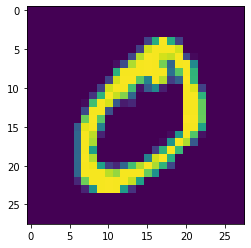

In [ ]:
#Plot an example image based on the image_index
import matplotlib.pyplot as plt

image_index = 1
print("Image Label is:", y_train[image_index])
plt.imshow(x_train[image_index])


In [ ]:
#Show how many training images there are and their size/features
x_train.shape


(60000, 28, 28)

In [ ]:
#Reshaping and processing data. It is normalised and prepped to be used in TF/Keras
x_train.shape
image_size = 28
num_train_images = 60000
num_test_images = 10000

x_train = x_train.reshape(num_train_images, image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(num_test_images, image_size, image_size, 1).astype('float32')
input_shape = (image_size, image_size, 1)
#Normalising data values ranging from 0-1
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)


x_train shape: (60000, 28, 28, 1)


In [ ]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(56, kernel_size=(6, 6), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu)) # Create fully connected layers (New Neuron layer)
model.add(Dense(128)) # Tried Leaky Relu, but normal relu works better
model.add(Dropout(0.2)) # Prevents overfitting, randomly sets outgoing edge sof hidden units to 0

model.add(Dense(10, activation=tf.nn.softmax)) # 10 classes and will pick the one with the greatest numerical value


In [ ]:

import time
model.compile(optimizer='sgd', # SGD is used as it generalises predictions better than adam
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
start = time.time()
model.fit(x=x_train,y=y_train, epochs=15)
print("Total Model Fit Time Was: ", (time.time() - start)/60, "minutes")
#Epochs after 15 did not improve accuracy and at times decreased before increasing. 
#This could be a sign of over fitting to training data.


Epoch 1/15
1875/1875 [==============================] - 13s 2ms/step - loss: 0.5171 - accuracy: 0.8526
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1442 - accuracy: 0.9562
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1030 - accuracy: 0.9694
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0827 - accuracy: 0.9749
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0713 - accuracy: 0.9784
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0621 - accuracy: 0.9818
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0560 - accuracy: 0.9833
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0512 - accuracy: 0.9846
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0467 - accuracy: 0.9859
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.04

In [ ]:
#Evaluate the performance - Finds Loss and Accuracy
model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0316 - accuracy: 0.9894


[0.0315791554749012, 0.9894000291824341]

In [ ]:
#Provides summary of the sequential mode and layers used
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 56)        2072      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 5, 56)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1400)              0         
                                                                 
 dense (Dense)               (None, 128)               179328    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

Here are the possibilities for each number

0 4.1927631855287473e-07
1 0.9998032450675964
2 1.7317051970167086e-07
3 7.748527375284198e-10
4 6.825708987889811e-05
5 8.211443081052039e-09
6 2.7380394840292865e-07
7 0.00012730171147268265
8 3.316214360893355e-07
9 5.985891249338238e-08


Predicted Handwritten Digit is:  1


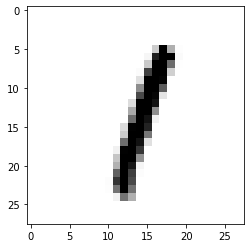

In [ ]:
import numpy as np
image_index = 5
image_to_predict = x_test[image_index].reshape(1, 28, 28, 1)
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(image_to_predict)
list1 = pred.tolist()[0]
print("Here are the possibilities for each number\n")
for count, i in enumerate(list1):
  print(count, i)
print("\n")

print("Predicted Handwritten Digit is: ", list1.index(max(list1)))

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test, batch_size=10000, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
confusion_mat = confusion_matrix(y_test, y_pred_bool, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(classification_report(y_test, y_pred_bool))
print("\n\nConfusion Matrix:\n\n{}".format(confusion_mat))


1/1 [==============================] - 0s 47ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Confusion Matrix:

[[ 976    0    0    0    0    0    0    2    2    0]
 [   0 1133    0    1    0    0    0    1    0    0]
 [   3    2 1017    0    1    0    1    4    4    0]
 [   1   